In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib as plt
%matplotlib inline

In [2]:
import requests
# Link created from query, but modifying 'html' to 'json'
r = requests.get('http://services7.arcgis.com/yUlpDmY4xMAdbBIp/arcgis/rest/services/ParksRocks/FeatureServer/0/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&quantizationParameters=&sqlFormat=none&f=json&token=')

dfjson = r.json()
dfjson.keys()
features = dfjson['features']

JSON FORMAT

{u'attributes': {u'CreationDate': 1492223813720,
   u'Creator': u'srn0629_dev',
   u'Date': 1492128000000,
   u'EditDate': 1492223813720,
   u'Editor': u'srn0629_dev',
   u'GlobalID': u'f83571f6-2c9e-4d32-843a-2983b7f842ba',
   u'HidorFound': u'Hid',
   u'OBJECTID': 1,
   u'ParkName': u'Alderwood',
   u'Quantity': 3,
   u'RockersName': u'Savanna'},
  u'geometry': {u'x': 1145976.5501281046, u'y': 686346.8414406658}}


In [3]:
for dct in features:
    for key, val in dct['attributes'].iteritems():
        dct[key] = val
    for key, val in dct['geometry'].iteritems():
        dct[key] = val
    del dct['attributes']
    del dct['geometry']

In [4]:
features[0:2]

[{u'Date': 1492128000000,
  u'GlobalID': u'3dc311c1-2f6c-417e-819a-204d9552ac4d',
  u'HidorFound': u'Hid',
  u'OBJECTID': 1,
  u'ParkName': u'Alderwood',
  u'Quantity': 3,
  u'RockersName': u'Savanna',
  u'x': 1145976.5501281046,
  u'y': 686346.8414406658},
 {u'Date': 1492239600000,
  u'GlobalID': u'80cb71c2-a1bb-4201-93b8-b12316043b03',
  u'HidorFound': u'Hid',
  u'OBJECTID': 2,
  u'ParkName': u'Alderwood',
  u'Quantity': 1,
  u'RockersName': u'buffy',
  u'x': 1145790.1711784978,
  u'y': 698453.1300803709}]

In [5]:
#from datetime import datetime
df = pd.DataFrame(features)
df.head(1)
#newDF['CreationDate'] = pd.to_datetime(newDF['CreationDate'])#,infer_datetime_format = True)
#df['date'] = pd.to_datetime(df['date'],unit='s')
#newDF['Date'] = pd.to_datetime(newDF['Date'])
#newDF.head(1)

,Date,GlobalID,HidorFound,OBJECTID,ParkName,Quantity,RockersName,x,y
0,1492128000000,3dc311c1-2f6c-417e-819a-204d9552ac4d,Hid,1,Alderwood,3,Savanna,1.145977e+06,686346.841441


In [6]:
# Number of events per park.
df['Date'].groupby(by = df['ParkName']).count()

ParkName
Alderwood    2
Name: Date, dtype: int64

In [7]:
# Number of total rocks per park.
df['Quantity'].groupby(by = df['ParkName']).sum()

ParkName
Alderwood    4
Name: Quantity, dtype: int64

In [8]:
# Number of hidden rocks per park.
totalrocksbypark = df[df['HidorFound']=='Hid']['Quantity'].groupby(by = df['ParkName']).sum()
totalrocksbypark

ParkName
Alderwood    4
Name: Quantity, dtype: int64

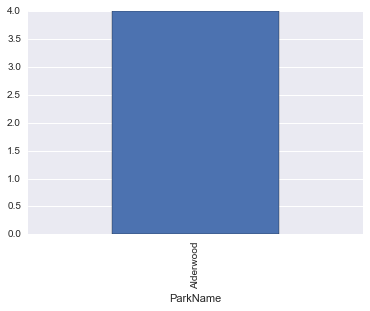

In [9]:
parkplot = totalrocksbypark.plot.bar()

In [10]:
fig = parkplot.get_figure()
fig.tight_layout()
fig.savefig("parkplot.jpg")

In [11]:
df.head()

,Date,GlobalID,HidorFound,OBJECTID,ParkName,Quantity,RockersName,x,y
0,1492128000000,3dc311c1-2f6c-417e-819a-204d9552ac4d,Hid,1,Alderwood,3,Savanna,1.145977e+06,686346.841441
1,1492239600000,80cb71c2-a1bb-4201-93b8-b12316043b03,Hid,2,Alderwood,1,buffy,1.145790e+06,698453.130080


In [12]:
# Number of hidden rock events per park.
parks_hid = pd.DataFrame(df[df['HidorFound']=='Hid']['Date'].groupby(by = df['ParkName']).count())
parks_hid.columns = ['Hid']
#df_year.columns = [str(year)]
parks_hid.head()

,Hid
ParkName,
Alderwood,2


In [13]:
# Number of found rock events per park.
parks_found = pd.DataFrame(df[df['HidorFound']=='Found']['Date'].groupby(by = df['ParkName']).count())
parks_found.columns = ['Found']
#df_year.columns = [str(year)]
parks_found.head()

,Found
ParkName,


In [14]:
#result = pd.concat([parks_hid, parks_found])
#result

parks_hid = parks_hid.join(parks_found, how = 'outer')
result = parks_hid.fillna(value = 0)
result

,Hid,Found
ParkName,,
Alderwood,2,0.0


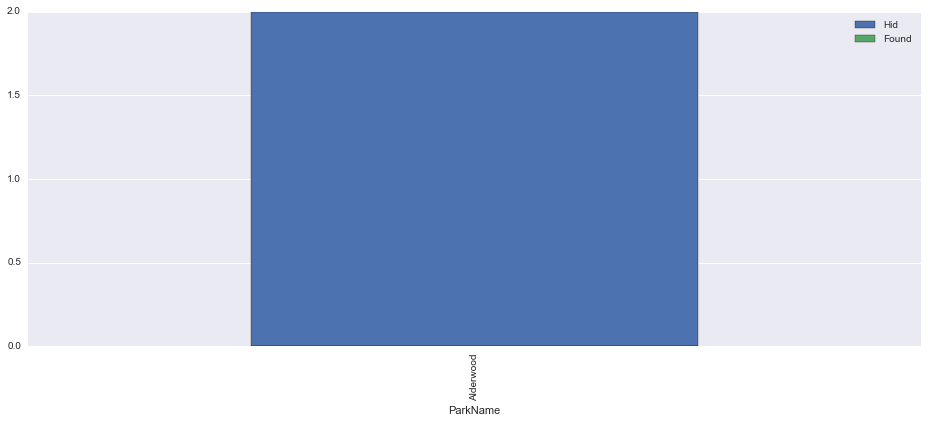

In [15]:
stacked_bar = result.ix[:,result.columns].plot.bar(stacked = True, figsize = (16,6));
stacked_bar

In [16]:
fig = stacked_bar.get_figure()
fig.tight_layout()
fig.savefig("stacked_bar.jpg")

In [17]:
# Number of rocks each rocker has hid/found
df.groupby(by = df['RockersName'])['Quantity'].count()

RockersName
Savanna    1
buffy      1
Name: Quantity, dtype: int64